19-1 들어가며 <br>
19-2 Transfer Learning과 Language Modeling <br>
19-3 ELMO(Embedding from Language Models) <br>
19-4 GPT(Generative Pre-Training Transformer) <br>
19-5 BERT(Bidirectional Encoder Representations from Transformers) <br>
19-6 Transformer-XL(Transformer Extra Long) <br>
19-7 XLNet, BART <br>
19-8 ALBERT(A Lite BERT for Self-supervised Learning of Language Representations) <br>
19-9 T5(Text-to-Text Transfer Transformer) <br>
19-10 Switch Transformer <br>
19-11 ERNIE <br>
19-12 마무리하며 <br><br>

### 19-2 Transfer Learning과 Language Modeling
#### Transfer Learning(전이 학습)
전이 학습은 특정 환경에서 학습을 마친 신경망(일부 혹은 전부)을 유사하거나 다른 환경에서 사용하는 것을 의미한다. 쉽게 생각해 보면, 사과를 깎는 것을 배운 아이에게 배를 깎도록 다시 학습시키는 것이다. 이미 사과를 깎는 것을 배웠으니 비슷하게 생긴 배도 유사한 방법으로 쉽게 깎을 수 있을 것이라고 생각이 들것이다.

#### Language Modeling(언어 모델)
언어 모델은 입력으로 주어진 시퀀스의 다음을 학습하는 과정에서 주어진 시퀀스가 얼마나 자연스러운지를 학습하게 된다. 즉, 언어 모델은 '철수가 밥을 마셨다'인지 '철수가 밥을 먹었다'인지를 데이터로부터 학습을 하게 된다. 이렇게 학습을 완료한 언 어모델은 언어의 패턴과 규칙을 학습하여 전반적인 언어의 특징을 익히게 된다. <br>

자연어 처리에서 바로 이 언어 모델이 pretrained model이 되는 것이다. 이미 언어의 전반적인 것을 아는 신경망에게 언어와 관련된 문제를 풀게 하는 것이다. 이처럼 주어진 문제(다운스트림 테스크 혹은 downstream task)를 잘 풀기 위해 pretrained model을 재학습시키는 것을 fine-tuning이라고 부른다.

#### Transformer
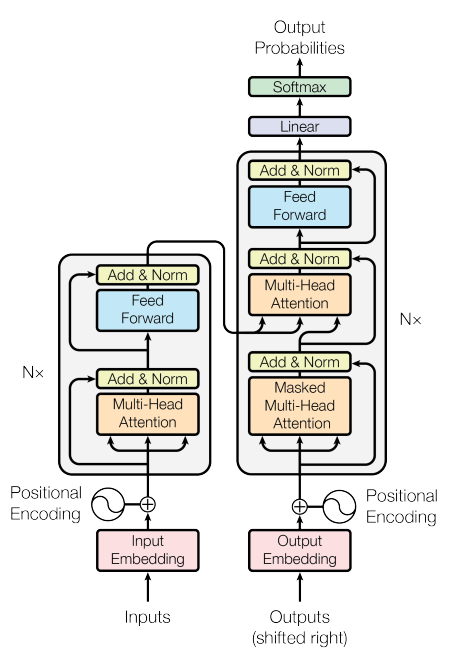 <br>

트랜스포머는 Encoder-Decoder 구조로, RNN이나 LSTM 등을 사용하지 않고 attention만을 이용한 모델이다. 그래서 비록 LSTM 등 RNN 구조를 사용하지 않지만 번역기 모델 등에 사용하는 seq2seq 모델과 구조적으로는 동일하다. Encoder-Decoder 모델이라면 입력부터 출력까지의 파이프라인이 이미 고정되어 있어서 이를 이용해 임베딩을 구하거나 전이 학습을 통해 다른 태스크에 활용하기 어려울 것 같다. 그렇다면 transformer 모델이 어떻게 modern NLP의 토대를 이루는 중요한 모델로 발전할 수 있었을까? <br><br>

### 19-3 ELMO(Embedding from Language Models)
#### ELMo의 구조
ELMo는 세가지 요소로 구성되어 있다. 첫 번째는 character-level CNN, 두번째는 bidirectional LSTM, 마지막으로 ELMo레이어가 있다. <br>
<b>1. character-level CNN</b> <br>
character-level CNN은 입력된 문자들 간의 관계를 파악하고 임베딩 벡터로 변환하는 역할을 한다. ELMo는 character level로 문자를 인식한다. 좀 더 구체적으로 말한다면, 해당 chracter의 유니코드 ID를 입력으로 받는다. 이렇게 각각 입력받은 단어의 사작과 끝에 해당하는 스페셜 토큰 <BOW>와 <EOW>에 해당하는 유니코드를 앞뒤로 붙여준다. 이후 각 유니코드 아이디에 해당하는 행 벡터를 참조하여 붙인다.(look-up-table) <br>
만들어진 벡터에 (n*임베딩 차원의 수) 필터로 컨볼루션하여 피처맵을 만들고 max-pooling하여 하나의 값을 뽑아낸다. 이러한 작업을 반복하여 사용자가 원하는 크기만큼의 벡터로 만들어 낸다. <br>
여기서 n은 한번에 몇 개의 문자들을 함께 볼 것인가를 의미한다. n이 2라면 <BOW> ㅂ, 바, ㅏㅂ, ㅂ <EOW>이렇게 문자 2개씩 보면서 2개 사이의 관계를 파악하는 CNN이 된다. <br>
ELMo의 original 코드에서는 각기 다른 사이즈를 가진 7개의 필터를 이용하여 2048차원의 벡터를 만든다고 한다. <br>
<b>2. bidirectional LSTM</b> <br>
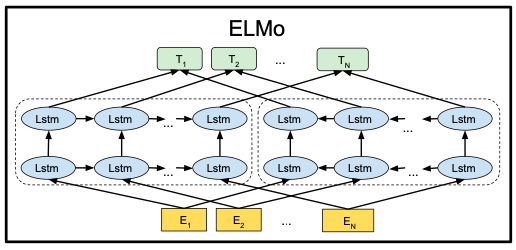 <br>
character-level CNN을 통과하여 만들어진 벡터 $(E_1, E_2, ..., E_N)$ 들은 bidirectional LSTM을 통과하게 된다. pretrain시에 bidirectional LSTM은 주어진 입력에 다음에 올 단어들을 예측한다. (bidirectional LM이라고도 불리운다.) <br>
bidirectional이라는 것은 양방향으로 학습하는 것을 의미한다. 주어진 입력을 한번은 순방향으로, 한번은 역방향으로 각각 2개의 LSTM layer를 통과하게 된다. 이렇게 양방향으로 학습하는 것은 모델의 사이즈와 학습에 걸리는 시간이 늘어날 수는 있지만 그만큼 성능이 좋다고 한다. <br>
pretrain시, 순방향과 역방향으로 LSTM을 통과한 히든 벡터들은 이후 softmax(소프트 맥스)를 취해 다음 단어를 예측하게 된다. 이때 <b>ELMo는 순방향과 역방향의 벡터를 합치거나 더하지 않는다.</b> 각각의 <b>독립적인</b> 모델처럼 행동하게 되는데, 이는 조금만 생각해 보면 이유를 알 수 있다. 하나는 순방향으로, 하나는 역방향으로 진행하다 보니 cheating(다른 방향의 모델에게 정답을 가르쳐 줌)의 가능성이 있기 때문이다. <br> 이렇게 ELMo는 단어를 하나씩 하나씩 슬라이딩하여 다음 단어를 예측하면서 문장 내의 단어와 단어들 사이의 관계를 학습하게 된다. <br>
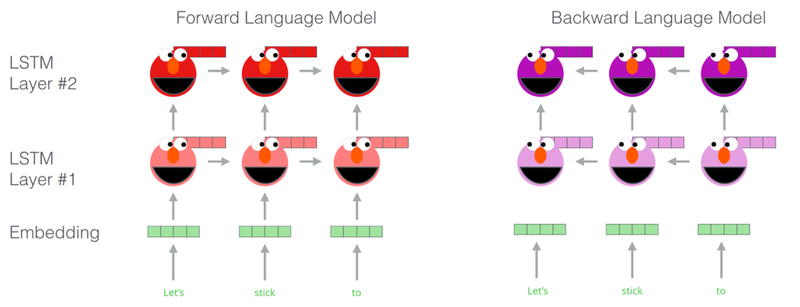 <br>
    
<b> 3. ELMO 임베딩 레이어 </b> <br>
ELMo 임베딩은 pretrain이 끝나고 finetuning을 하는 과정에서 만들어진다. <br>
맨 위 그림에서 Elmo 인형과의 대화처럼 stick이란 단어의 임베딩을 구한다고 가정해 보자. <br>
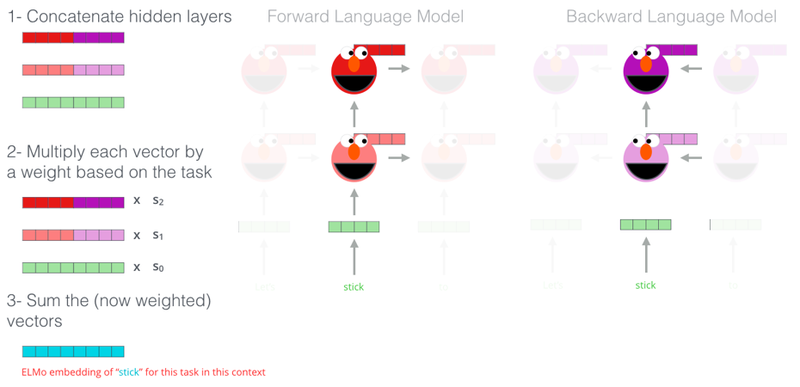 <br>
우선 구하려고 하는 토큰에 대한 각 층의 출력값을 모두 가지고 온다. 여기서의 각 층의 출력값이라고 하면, 임베딩 벡터(character-level CNN을 통과한 후 나오는 벡터), 각각의 LSTM layer에서의 hidden vector를 의미한다. <br>
각 층 1, 2, ..., 1, ... 마다 가중치 $ S_1, S_2, ..., S_l, ... $를 곱해서 모두 더해준다. (weighted sum 혹은 가중합을 해준다고 말할 수 있다.) 마지막으로 다운스트림 태스크의 가중치 y를 곱하면 ELMo의 임베딩이 된다.
    여기서 갑자기 등장하는 가중치 S_1와 Y는 다운스트림 태스크별로 <b>finetuning시 학습</b>되는 값들이다. 복잡해 보이지만, <b>구하고자 하는 토큰에 대한 각층의 출력값을 가중합한 것</b>이 ELMo 임데빙이다. <br>

#### ELMo의 이용
6가지 task로 평가한다. <br>
    - Question Answering <br>
    - Textual Entailment <br>
    - Semantic Role labeling <br>
    - Coreference Resolution <br>
    - Named Entity Extraction <br>
    - Sentiment Analysis <br><br>
    
    
### 19-4 GPT(Generative Pre-Training Transformer)
GPT는 <b>트랜스포머의 decoder 구조만을 이용하여 만든 네트워크</b>이다. 트랜스포머의 decoder를 아주 깊고 깊게 쌓아 많은 데이터를 학습 시켜 성능을 높힌 네트워크다! <br>
    
#### GPT의 구조 
'Decoder만을 이용했다는 게 뭐야?'라는 생각이 든다면 다음 그림 참고 <br>
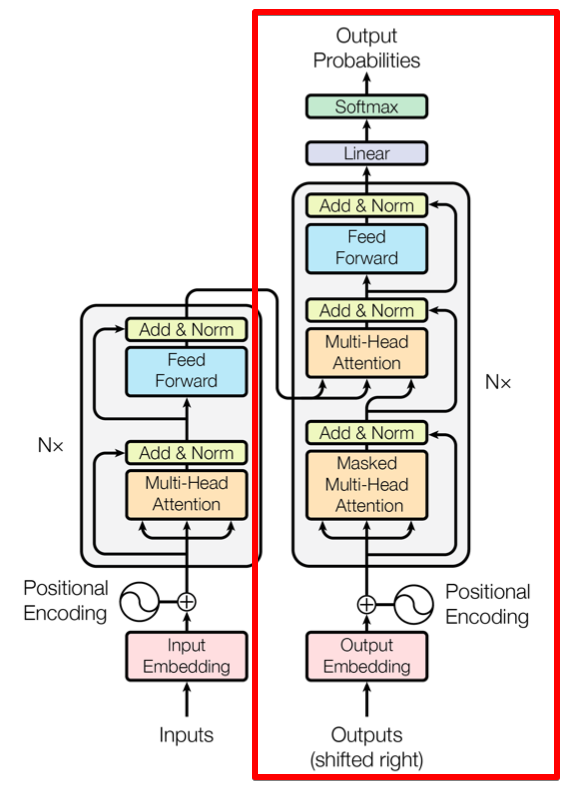<br>
Decoder는 masked Multi-Head Attention, Multi-Head Attention, Feed Forward Neural Network로 이루어져 있었다. 바로 이 구조를 차용하여 Decoder block를 많이 쌓아 올리면 바로 GPT가 되는 것이다. <br>
    
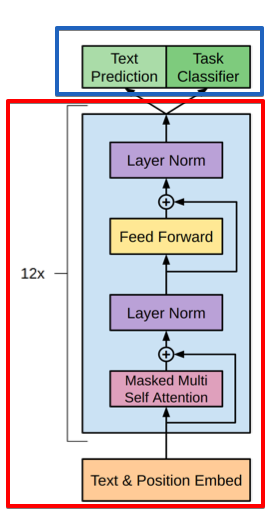 <br>
<b>1.Embedding </b>
GPT는 텍스트의 Embedding으로 <b>BPE(Byte-pair Encoding)</b>을 사용하고 있다. 
BPE는 모든 단어를 문자(바이트)들의 집합으로 취급하여 자주 등장하는 문자 쌍을 합치는 subword tokenization이었다. 처음 보는 단어일지라도ㅓ 문자(알파벳)들의 조합으로 나타내어 OOV 문제를 해결할 수 있다는 장점이 있었다. <br>
기존 트랜스포머와 마찬가지로 position encoding(포지션 인코딩)도 함께 사용한다. <br>

<b>2. Masked Multi-Head Attention </b> <br>
<b> Masked Multi-Head Attention</b> 모든 것을 병렬적으로 처리하는 트랜스포머에게 자기회귀적(Autogressive)인 특성을 부여하기 위해 만든 장치이다. 여기서 자귀회귀적이라 함은 훈련 단계에서 디코더에게 정답 문장을 매 스텝 단위로 단어 하나씩 알려주고 그 다음 단어를 예측(Next Token Prediciton)하게 하는 형태로 학습되는 형태라는 뜻이다. 이는 마치 sequence-to-sequence모델에서 디코더가 번역 분장을 생성할 때 time-step을 하나하나 거치듯이 만들어주는 것이다. 순차처리 방식의 RNN과 달리 정답 문장의 모든 단어를 한꺼번에 입력받는 트랜스포머의 decoder는 학습할 때 현재 자기보다 미래에 생성될 토큰을 보지 못하도록 masking이 필요하게 된다. <br>
    
사실 이 구조는 <b>언어 모델</b>과 같은 구조다. 다시 한번 되짚어 보자면, 언어 모델은 비지도 학습을 통해 문장의 자연스러운 순서를 학습하게 e된다. 그래서 GPT는 문자 생성에 매우 특화되어 있다. GPT를 연구한 Open AI도 너무나 자연스러운 문장을 만들어내서 그 악용이 두렵다며 전체 소스 코드를 공개하지 않았을 정도이니깐! 그렇다고 해서 요약, 텍스트 분류 등 다른 task들에서 성능이 떨어지는 것은 아니다. <br>

pretrain이 끝나게 되면 GPT는 downstream task에 맞게 finetuning을 하게 됩니다. 파란색 박스 부분에 해당되는 부분이 기존에 봐왔던 모델들과 조금 다른 점을 발견할 수 있는데 바로 <b>두 개의 Objective</b>가 존재하는 것이다. <br>

text prediction과 text classification이 각각 다른 모델들을 이용하여 output을 만들어내는 것이 아니라 한 모델에서 동시에 output을 내는 겁니다. (Auxiliary objective) 주요 task에 대한 정확도가 더 올라갔음을 확인했다고 하네요. 생각해 보면 LM 또한, auxiliary로 얻어진 결과라고 생각할 수 있습니다. 시퀀스의 다음 나올 단어들을 학습하다 보니 전체적인 언어의 구조를 알게 된 것이지요.

그렇다면 GPT의 모델 부분을 코드로 한 번 확인해 볼까요? 전체 코드를 한 번에 보면 복잡해 보일 수도 있겠지만, TFGPT2MainLayer라는 전체 모델 클래스 안에서 TFBlock 레이어 클래스를 반복해서 사용하고 있는 부분을 눈여겨 봐주세요. TFBlock 클래스 안에서 TFAttention, TFMLP 레이어가 사용되는 구조가 위에서 소개한 GPT의 모델 구조 그림에 표현되어 있습니다.

In [ ]:
class TFAttention(tf.keras.layers.Layer):
    def __init__(self, nx, n_ctx, config, scale=False, **kwargs):
        super().__init__(**kwargs)

        n_state = nx  # in Attention: n_state=768 (nx=n_embd)
        # [switch nx => n_state from Block to Attention to keep identical to TF implem]
        assert n_state % config.n_head == 0
        self.n_ctx = n_ctx
        self.n_head = config.n_head
        self.split_size = n_state
        self.scale = scale
        self.output_attentions = config.output_attentions

        self.c_attn = TFConv1D(n_state * 3, nx, initializer_range=config.initializer_range, name="c_attn")
        self.c_proj = TFConv1D(n_state, nx, initializer_range=config.initializer_range, name="c_proj")
        self.attn_dropout = tf.keras.layers.Dropout(config.attn_pdrop)
        self.resid_dropout = tf.keras.layers.Dropout(config.resid_pdrop)
        self.pruned_heads = set()

    def prune_heads(self, heads):
        pass

    @staticmethod
    def causal_attention_mask(nd, ns, dtype):
        """
        1-2) masked attention에서 설명한 masking 부분
        """
        i = tf.range(nd)[:, None]
        j = tf.range(ns)
        m = i >= j - ns + nd
        return tf.cast(m, dtype)

    def _attn(self, q, k, v, attention_mask, head_mask, output_attentions, training=False):
				"""
				1-2) attention 계산
        q, k, v 의 shape : [batch, heads, sequence, features]
				"""

        w = tf.matmul(q, k, transpose_b=True)
        if self.scale:
            dk = tf.cast(shape_list(k)[-1], tf.float32)  # scale attention_scores
            w = w / tf.math.sqrt(dk)

        # w shape : [batch, heads, dst_sequence, src_sequence]
        _, _, nd, ns = shape_list(w)
        b = self.causal_attention_mask(nd, ns, dtype=w.dtype)
        b = tf.reshape(b, [1, 1, nd, ns])
        w = w * b - 1e4 * (1 - b)

        if attention_mask is not None:
            # attention mask 적용
            w = w + attention_mask

        w = tf.nn.softmax(w, axis=-1)
        w = self.attn_dropout(w, training=training)

        # Mask heads if we want to
        if head_mask is not None:
            w = w * head_mask

        outputs = [tf.matmul(w, v)]
        if output_attentions:
            outputs.append(w)
        return outputs

    def merge_heads(self, x):
        x = tf.transpose(x, [0, 2, 1, 3])
        x_shape = shape_list(x)
        new_x_shape = x_shape[:-2] + [x_shape[-2] * x_shape[-1]]
        return tf.reshape(x, new_x_shape)

    def split_heads(self, x):
        x_shape = shape_list(x)
        new_x_shape = x_shape[:-1] + [self.n_head, x_shape[-1] // self.n_head]
        x = tf.reshape(x, new_x_shape)
        return tf.transpose(x, (0, 2, 1, 3))  # (batch, head, seq_length, head_features)

    def call(self, x, layer_past, attention_mask, head_mask, use_cache, output_attentions, training=False):
        x = self.c_attn(x)
        query, key, value = tf.split(x, 3, axis=2)
        query = self.split_heads(query)
        key = self.split_heads(key)
        value = self.split_heads(value)
        if layer_past is not None:
            past_key, past_value = tf.unstack(layer_past, axis=0)
            key = tf.concat([past_key, key], axis=-2)
            value = tf.concat([past_value, value], axis=-2)

        # keras serialization을 위한 코드
        if use_cache:
            present = tf.stack([key, value], axis=0)
        else:
            present = (None,)

        attn_outputs = self._attn(query, key, value, attention_mask, head_mask, output_attentions, training=training)
        a = attn_outputs[0]

        a = self.merge_heads(a)
        a = self.c_proj(a)
        a = self.resid_dropout(a, training=training)

        outputs = [a, present] + attn_outputs[1:]
        return outputs  # a, present, (attentions)


class TFMLP(tf.keras.layers.Layer):
"""
Transformer의 Decoder Block에서 Feed Foward를 구현해 둔 부분
"""
    def __init__(self, n_state, config, **kwargs):
        super().__init__(**kwargs)
        nx = config.n_embd
        self.c_fc = TFConv1D(n_state, nx, initializer_range=config.initializer_range, name="c_fc")
        self.c_proj = TFConv1D(nx, n_state, initializer_range=config.initializer_range, name="c_proj")
        self.act = get_tf_activation("gelu")
        self.dropout = tf.keras.layers.Dropout(config.resid_pdrop)

    def call(self, x, training=False):
        h = self.act(self.c_fc(x)) # conv1d로 flatten 후 activation 적용
        h2 = self.c_proj(h)
        h2 = self.dropout(h2, training=training)
        return h2


class TFBlock(tf.keras.layers.Layer):
"""
Transformer의 Decoder Block을 구현해 둔 부분
"""
    def __init__(self, n_ctx, config, scale=False, **kwargs):
        super().__init__(**kwargs)
        nx = config.n_embd
        inner_dim = config.n_inner if config.n_inner is not None else 4 * nx
        self.ln_1 = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_epsilon, name="ln_1")
        self.attn = TFAttention(nx, n_ctx, config, scale, name="attn")
        self.ln_2 = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_epsilon, name="ln_2")
        self.mlp = TFMLP(inner_dim, config, name="mlp")

    def call(self, x, layer_past, attention_mask, head_mask, use_cache, output_attentions, training=False):
        a = self.ln_1(x)
        output_attn = self.attn(
            a, layer_past, attention_mask, head_mask, use_cache, output_attentions, training=training
        )
        a = output_attn[0]  # output_attn: a, present, (attentions)
        x = x + a

        m = self.ln_2(x)
        m = self.mlp(m, training=training)
        x = x + m

        outputs = [x] + output_attn[1:]
        return outputs  # x, present, (attentions)


@keras_serializable
class TFGPT2MainLayer(tf.keras.layers.Layer):
"""
모델의 전체 구조
"""
    config_class = GPT2Config

    def __init__(self, config, *inputs, **kwargs):
        super().__init__(*inputs, **kwargs)
        self.output_attentions = config.output_attentions
        self.output_hidden_states = config.output_hidden_states
        self.use_cache = config.use_cache
        self.return_dict = config.use_return_dict

        self.num_hidden_layers = config.n_layer
        self.vocab_size = config.vocab_size
        self.n_embd = config.n_embd

        self.wte = TFSharedEmbeddings(
            config.vocab_size, config.hidden_size, initializer_range=config.initializer_range, name="wte"
        )
        self.wpe = tf.keras.layers.Embedding(
            config.n_positions,
            config.n_embd,
            embeddings_initializer=get_initializer(config.initializer_range),
            name="wpe",
        )
        self.drop = tf.keras.layers.Dropout(config.embd_pdrop)
        self.h = [TFBlock(config.n_ctx, config, scale=True, name="h_._{}".format(i)) for i in range(config.n_layer)]
        self.ln_f = tf.keras.layers.LayerNormalization(epsilon=config.layer_norm_epsilon, name="ln_f")

    def get_input_embeddings(self):
        return self.wte

    def set_input_embeddings(self, value):
        self.wte.weight = value
        self.wte.vocab_size = self.wte.weight.shape[0]

    def _prune_heads(self, heads_to_prune):
        """
        Prunes heads of the model. heads_to_prune: dict of {layer_num: list of heads to prune in this layer}
        """
        raise NotImplementedError

    def call(
        self,
        inputs,
        past=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        use_cache=None,
        output_attentions=None,
        output_hidden_states=None,
        return_dict=None,
        training=False,
    ):
        if isinstance(inputs, (tuple, list)):
            input_ids = inputs[0]
            past = inputs[1] if len(inputs) > 1 else past
            attention_mask = inputs[2] if len(inputs) > 2 else attention_mask
            token_type_ids = inputs[3] if len(inputs) > 3 else token_type_ids
            position_ids = inputs[4] if len(inputs) > 4 else position_ids
            head_mask = inputs[5] if len(inputs) > 5 else head_mask
            inputs_embeds = inputs[6] if len(inputs) > 6 else inputs_embeds
            use_cache = inputs[7] if len(inputs) > 7 else use_cache
            output_attentions = inputs[8] if len(inputs) > 8 else output_attentions
            output_hidden_states = inputs[9] if len(inputs) > 9 else output_hidden_states
            return_dict = inputs[10] if len(inputs) > 10 else return_dict
            assert len(inputs) <= 11, "Too many inputs."
        elif isinstance(inputs, (dict, BatchEncoding)):
            input_ids = inputs.get("input_ids")
            past = inputs.get("past", past)
            attention_mask = inputs.get("attention_mask", attention_mask)
            token_type_ids = inputs.get("token_type_ids", token_type_ids)
            position_ids = inputs.get("position_ids", position_ids)
            head_mask = inputs.get("head_mask", head_mask)
            inputs_embeds = inputs.get("inputs_embeds", inputs_embeds)
            use_cache = inputs.get("use_cache", use_cache)
            output_attentions = inputs.get("output_attentions", output_attentions)
            output_hidden_states = inputs.get("output_hidden_states", output_hidden_states)
            return_dict = inputs.get("return_dict", return_dict)
            assert len(inputs) <= 11, "Too many inputs."
        else:
            input_ids = inputs

        output_attentions = output_attentions if output_attentions is not None else self.output_attentions
        output_hidden_states = output_hidden_states if output_hidden_states is not None else self.output_hidden_states
        use_cache = use_cache if use_cache is not None else self.use_cache
        return_dict = return_dict if return_dict is not None else self.return_dict

        if input_ids is not None and inputs_embeds is not None:
            raise ValueError("You cannot specify both input_ids and inputs_embeds at the same time")
        elif input_ids is not None:
            input_shape = shape_list(input_ids)
            input_ids = tf.reshape(input_ids, [-1, input_shape[-1]])
        elif inputs_embeds is not None:
            input_shape = shape_list(inputs_embeds)[:-1]
        else:
            raise ValueError("You have to specify either input_ids or inputs_embeds")

        if past is None:
            past_length = 0
            past = [None] * len(self.h)
        else:
            past_length = shape_list(past[0][0])[-2]
        if position_ids is None:
            position_ids = tf.range(past_length, input_shape[-1] + past_length, dtype=tf.int32)[tf.newaxis, :]

        if attention_mask is not None:
            # 3D attention mask 만들기
            # Sizes : [batch_size, 1, 1, to_seq_length]
            # 3D attention mask를 [batch_size, num_heads, from_seq_length, to_seq_length]로 브로드캐스팅

            attention_mask = attention_mask[:, tf.newaxis, tf.newaxis, :]

            # attention_mask가 1.0이면 포함, 0.0이면 미포함 하여 attention 계산
            attention_mask = tf.cast(attention_mask, tf.float32)
            attention_mask = (1.0 - attention_mask) * -10000.0
        else:
            attention_mask = None

        # head_mask가 1.0이면, head를 유지
        # attention_probs : shape bsz x n_heads x N x N
        # input head_mask : shape [num_heads] 또는 [num_hidden_layers x num_heads]
        # head_mask : shape [num_hidden_layers x batch x num_heads x seq_length x seq_length]
        if head_mask is not None:
            raise NotImplementedError
        else:
            head_mask = [None] * self.num_hidden_layers
            # head_mask = tf.constant([0] * self.num_hidden_layers)

        position_ids = tf.reshape(position_ids, [-1, shape_list(position_ids)[-1]])

        if inputs_embeds is None:
            inputs_embeds = self.wte(input_ids, mode="embedding")
        position_embeds = self.wpe(position_ids)
        if token_type_ids is not None:
            token_type_ids = tf.reshape(token_type_ids, [-1, shape_list(token_type_ids)[-1]])
            token_type_embeds = self.wte(token_type_ids, mode="embedding")
        else:
            token_type_embeds = 0
        hidden_states = inputs_embeds + position_embeds + token_type_embeds
        hidden_states = self.drop(hidden_states, training=training)

        output_shape = input_shape + [shape_list(hidden_states)[-1]]

        presents = () if use_cache else None
        all_attentions = () if output_attentions else None
        all_hidden_states = () if output_hidden_states else None
        for i, (block, layer_past) in enumerate(zip(self.h, past)):
            if output_hidden_states:
                all_hidden_states = all_hidden_states + (tf.reshape(hidden_states, output_shape),)

            outputs = block(
                hidden_states,
                layer_past,
                attention_mask,
                head_mask[i],
                use_cache,
                output_attentions,
                training=training,
            )

            hidden_states, present = outputs[:2]
            if use_cache:
                presents = presents + (present,)

            if output_attentions:
                all_attentions = all_attentions + (outputs[2],)

        hidden_states = self.ln_f(hidden_states)

        hidden_states = tf.reshape(hidden_states, output_shape)
        # Add last hidden state
        if output_hidden_states:
            all_hidden_states = all_hidden_states + (hidden_states,)

        if output_attentions:
            attention_output_shape = input_shape[:-1] + [-1] + shape_list(all_attentions[0])[-2:]
            all_attentions = tuple(tf.reshape(t, attention_output_shape) for t in all_attentions)

        if not return_dict:
            return tuple(v for v in [hidden_states, presents, all_hidden_states, all_attentions] if v is not None)

        return TFBaseModelOutputWithPast(
            last_hidden_state=hidden_states,
            past_key_values=presents,
            hidden_states=all_hidden_states,
            attentions=all_attentions,
        )